# Quel(s) impact(s) a(ont) eu le(s) confinement(s) sur l’affluence sur Twitch ?

### Analyse de la frequentation de Twitch dans le temps

In [156]:
import pandas as pd
import seaborn as sb
#import matplotlib as mpl
#import numpy as np

import warnings
warnings.filterwarnings('ignore')

#import csv
df_game=pd.read_csv(r'.\Twitch_game_data.csv',encoding='cp1252')
df_twitch=pd.read_csv(r'.\Twitch_global_data.csv',encoding='cp1252')
df_twitch

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"
...,...,...,...,...,...,...,...,...
67,2021,8,1974586275,2657585,4778502,20767741,100701,"36,471"
68,2021,9,1857514531,2583469,5599210,18826493,95513,"35,861"
69,2021,10,2020197953,2718974,6086487,18209793,91858,"36,406"
70,2021,11,1812117484,2520330,5941684,17415525,90774,"35,043"


Dans un premier temps nous allons regarder entre 2016 et 2021 la Moyenne de spectateurs sur la totalité de la plateforme afin de determiner dans quelle(s) periode(s) il y a eu le plus grand nombre de spectateurs

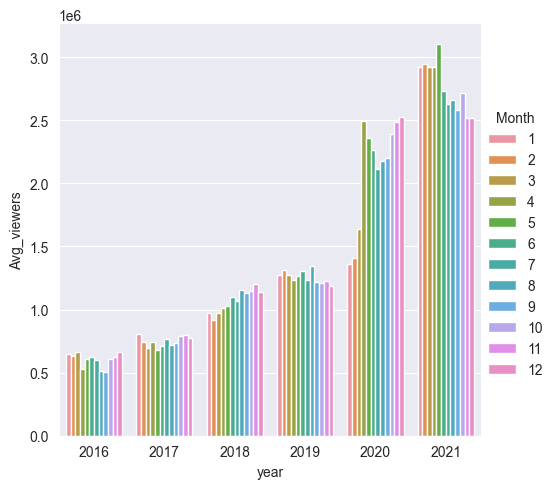

In [157]:
sb.catplot(data=df_twitch, x="year", y="Avg_viewers", hue='Month',kind='bar')


On voit donc qu'entre 2016 et 2019 la plateforme se developpe progressivement avec un croissance qui se fait de facon assez constante.
et dès Avril 2020, on voit un gros pique qui se reduit au alentours des vacances d'été avant de remonté disctinctement dès octobre 2020 et particulierement 1er Janvier 2021

<AxesSubplot: xlabel='Month', ylabel='Hours_watched'>

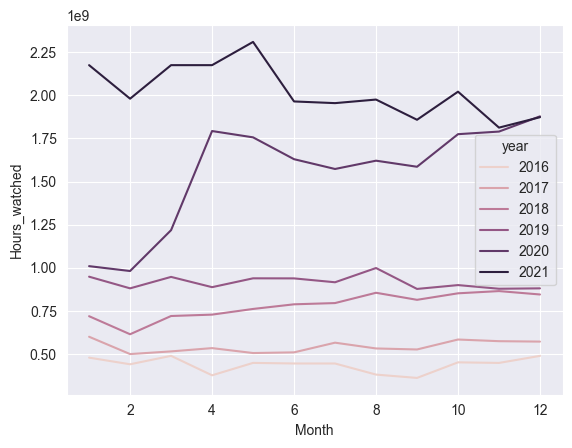

In [158]:
sb.lineplot(data=df_twitch, x='Month',y="Hours_watched",hue="year" )

En consultant la courbe de la moyenne d'heure de visionnage, on peut confirmer qu'a partir d'avril 2020 le temps de visionnage sur la plateforme est en forte hausse. Nous allons regarder quels sont les jeux qui ont été streamés le plus durant cette periode et ce que le confinent a eu comme effet dessus.

In [159]:
df_game

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87


Le Dataset presente le top 200 des meilleurs jeux qui ont été stream par mois du 1er janvier au 31 décembre 2021. Le problème que cela peut présenter est la grande quantité de données que cela donne, car j'ai l'evolution de 200 jeux par mois pendant 6 ans, et a chaque mois j'ai un jeu ou plusieurs jeux qui peuvent monter comme descendre dans le classement et donc apparaître ou disparaître.

In [ ]:
sb.catplot(data=df_game.query("Rank<=3 and Year==2016"),x="Month", y="Avg_viewers", hue='Game',kind="swarm")
sb.catplot(data=df_game.query("Rank<=3 and Year==2017"),x="Month", y="Avg_viewers", hue='Game',kind="swarm")
sb.catplot(data=df_game.query("Rank<=3 and Year==2018"),x="Month", y="Avg_viewers", hue='Game',kind="swarm")
sb.catplot(data=df_game.query("Rank<=3 and Year==2019"),x="Month", y="Avg_viewers", hue='Game',kind="swarm")
sb.catplot(data=df_game.query("Rank<=3 and Year==2020"),x="Month", y="Avg_viewers", hue='Game',kind="swarm")
sb.catplot(data=df_game.query("Rank<=3 and Year==2021"),x="Month", y="Avg_viewers", hue='Game',kind="swarm")

J'ai donc regardé la moyenne de spectateur sur les 3 meilleurs "jeux" par mois durant les 6 différentes années. On remarque qu'entre 2016 et 2021, les jeux League of Legends, Counter-Strike, Dota 2 sont présents, ce qui montre que les jeux collectifs semblent attirer de nombreux spectateurs. Ce qui ressort particulièrement à partir de la fin 2019 et durant les deux années 2020 et 2021, c'est la démocratisation du 'just chatting' qui a fait une montée en flèche, cela peut s'expliquer par le besoin de partager avec des internautes ou tout simplement d'autres personnes sur des sujets divers et variés.

On va donc s'intéresser à la quantité de chaines qui se sont lancés a partir de 2020 et en 2021 sur le Just Chatting

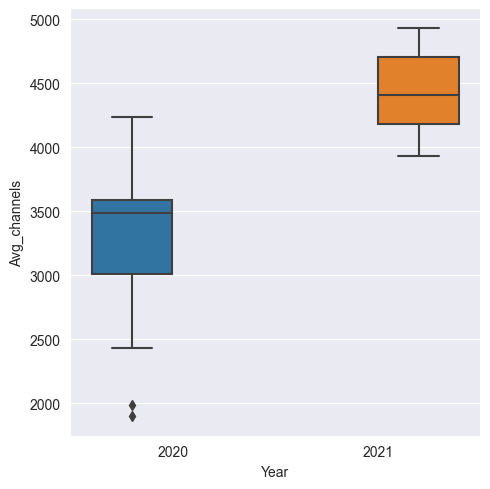

In [170]:
sb.catplot(data=df_game.query("Game=='Just Chatting' and Year==2020 or Game=='Just Chatting' and Year==2021"),x="Year", y="Avg_channels", hue='Year',kind="box")